In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [77]:
N = 20

X = np.random.random(N) * 10 - 5

Y = .5 * X - 1 + np.random.randn(N)

In [78]:
X

array([-4.855147  , -2.03475181, -0.63977304, -1.79178424, -3.01119353,
        0.670497  , -3.86899394,  0.52152454, -2.2280174 ,  1.83881707,
       -2.86038903, -3.87961189,  1.71922835,  1.87316179,  2.0962462 ,
        2.30810275,  3.70871046, -1.18329879, -2.15031791, -4.28580587])

In [79]:
Y

array([-3.56297985e+00, -1.55399847e+00, -1.27555553e+00, -1.09373563e+00,
       -2.88395158e+00,  8.93786231e-01, -1.48620051e+00, -1.42064831e+00,
       -1.72069303e+00, -1.17980301e+00, -2.74614009e+00, -4.81867309e+00,
       -1.64940868e+00,  1.61288086e+00,  5.53538066e-01, -1.42088384e+00,
        1.52762768e+00, -1.40510990e+00, -3.75719882e-04, -1.31247935e+00])

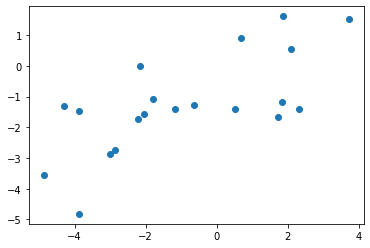

In [80]:
plt.scatter(X, Y)
plt.show()

In [102]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)


model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

inputs = torch.from_numpy(X.astype(np.float32))
outputs = torch.from_numpy(Y.astype(np.float32))

In [103]:
epochs = 30
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch + 1}/{epochs}: Loss: {loss.item():.4f}")

Epoch 1/30: Loss: 4.3328
Epoch 2/30: Loss: 2.3834
Epoch 3/30: Loss: 1.8373
Epoch 4/30: Loss: 1.6207
Epoch 5/30: Loss: 1.5040
Epoch 6/30: Loss: 1.4306
Epoch 7/30: Loss: 1.3816
Epoch 8/30: Loss: 1.3485
Epoch 9/30: Loss: 1.3259
Epoch 10/30: Loss: 1.3105
Epoch 11/30: Loss: 1.3000
Epoch 12/30: Loss: 1.2929
Epoch 13/30: Loss: 1.2880
Epoch 14/30: Loss: 1.2846
Epoch 15/30: Loss: 1.2824
Epoch 16/30: Loss: 1.2808
Epoch 17/30: Loss: 1.2797
Epoch 18/30: Loss: 1.2790
Epoch 19/30: Loss: 1.2785
Epoch 20/30: Loss: 1.2782
Epoch 21/30: Loss: 1.2779
Epoch 22/30: Loss: 1.2778
Epoch 23/30: Loss: 1.2777
Epoch 24/30: Loss: 1.2776
Epoch 25/30: Loss: 1.2776
Epoch 26/30: Loss: 1.2775
Epoch 27/30: Loss: 1.2775
Epoch 28/30: Loss: 1.2775
Epoch 29/30: Loss: 1.2775
Epoch 30/30: Loss: 1.2775


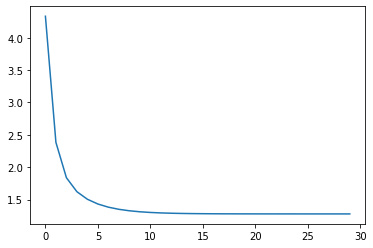

In [104]:
plt.plot(losses);

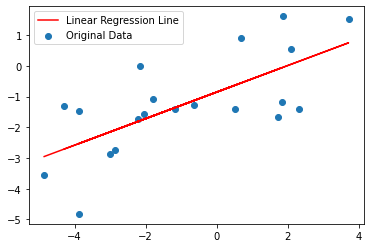

In [105]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label="Original Data")
plt.plot(X, predicted, label="Linear Regression Line", color="red")
plt.legend()
plt.show()

In [94]:
inputs

tensor([[-4.8551],
        [-2.0348],
        [-0.6398],
        [-1.7918],
        [-3.0112],
        [ 0.6705],
        [-3.8690],
        [ 0.5215],
        [-2.2280],
        [ 1.8388],
        [-2.8604],
        [-3.8796],
        [ 1.7192],
        [ 1.8732],
        [ 2.0962],
        [ 2.3081],
        [ 3.7087],
        [-1.1833],
        [-2.1503],
        [-4.2858]])

In [95]:
with torch.no_grad():
    results = model(inputs).numpy()
results

array([[-2.9517481 ],
       [-1.7330709 ],
       [-1.1303082 ],
       [-1.628086  ],
       [-2.1549861 ],
       [-0.5641476 ],
       [-2.525637  ],
       [-0.62851775],
       [-1.8165798 ],
       [-0.05932277],
       [-2.0898242 ],
       [-2.530225  ],
       [-0.11099643],
       [-0.04448265],
       [ 0.05191094],
       [ 0.14345306],
       [ 0.748648  ],
       [-1.3651626 ],
       [-1.7830064 ],
       [-2.705739  ]], dtype=float32)

In [99]:
print(f"The true Weight is: {.5} and the true bias is {-1}")
print("Weight is: ", model.weight.data.numpy()[0, 0])
print("Bias is: ", model.bias.data.numpy()[0])

The true Weight is: 0.5 and the true bias is -1
Weight is:  0.43209457
Bias is:  -0.8538657
